In [ ]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/Teeth_final.zip'

Archive:  /content/Teeth_final.zip
   creating: Teeth_final/test/
   creating: Teeth_final/test/dc/
  inflating: Teeth_final/test/dc/dc (1).jpg  
  inflating: Teeth_final/test/dc/dc (10).jpg  
  inflating: Teeth_final/test/dc/dc (11).jpg  
  inflating: Teeth_final/test/dc/dc (12).jpg  
  inflating: Teeth_final/test/dc/dc (13).jpg  
 extracting: Teeth_final/test/dc/dc (14).jpg  
  inflating: Teeth_final/test/dc/dc (15).jpg  
  inflating: Teeth_final/test/dc/dc (16).jpg  
  inflating: Teeth_final/test/dc/dc (17).jpg  
  inflating: Teeth_final/test/dc/dc (18).jpg  
  inflating: Teeth_final/test/dc/dc (19).jpg  
  inflating: Teeth_final/test/dc/dc (2).jpg  
  inflating: Teeth_final/test/dc/dc (20).jpg  
  inflating: Teeth_final/test/dc/dc (21).jpg  
  inflating: Teeth_final/test/dc/dc (22).jpg  
  inflating: Teeth_final/test/dc/dc (23).jpg  
  inflating: Teeth_final/test/dc/dc (24).jpg  
  inflating: Teeth_final/test/dc/dc (25).jpg  
  inflating: Teeth_final/test/dc/dc (26).jpg  
  inflati

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 

In [ ]:
train_path  = "/content/Teeth_final/train"
valid_path  = "/content/Teeth_final/valid"
test_path   = "/content/Teeth_final/test"
print("splited")

splited


In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 577 images belonging to 4 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 130 images belonging to 4 classes.


In [ ]:
valid_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
valid = train_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224), shuffle= False)

Found 91 images belonging to 4 classes.


In [ ]:
train.class_indices

{'dc': 0, 'gg': 1, 'uc': 2, 'wc': 3}

In [ ]:
class_type = {0:'dc',
 1:'gg',
 2:'uc',
 3:'wc',
}

In [ ]:
t_img , label = train.next()

In [ ]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

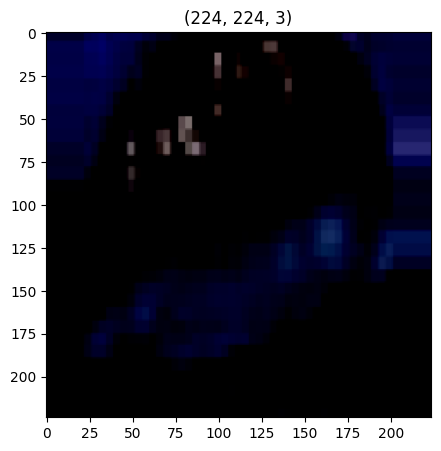

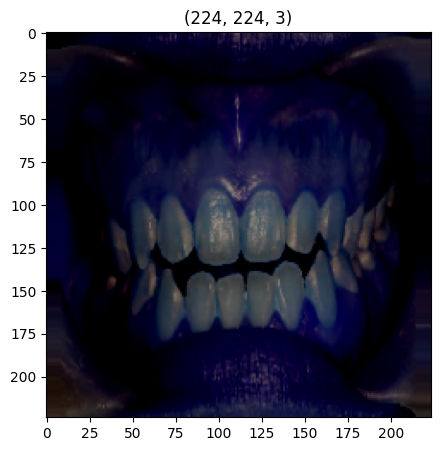

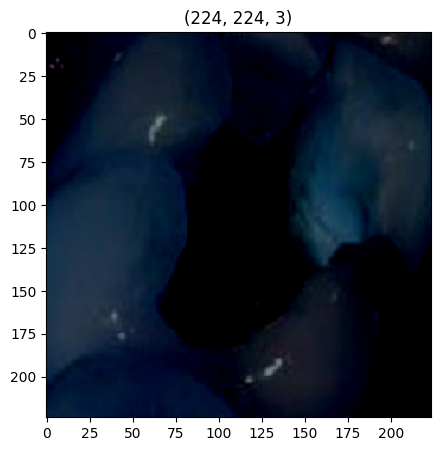

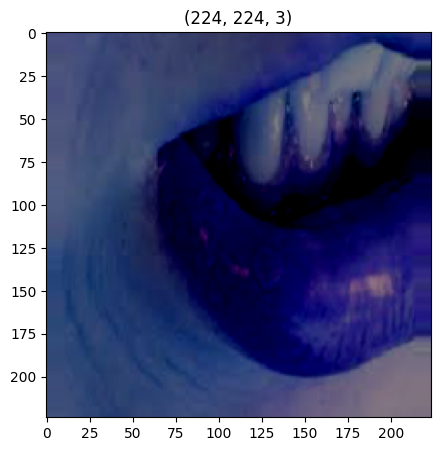

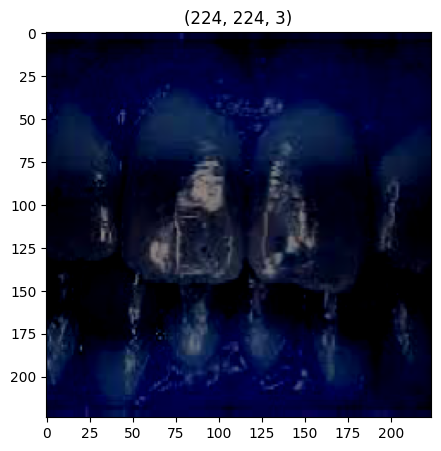

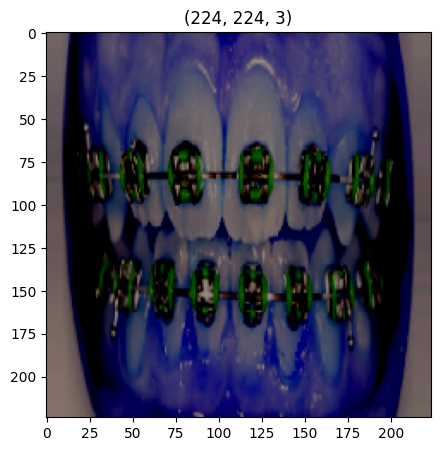

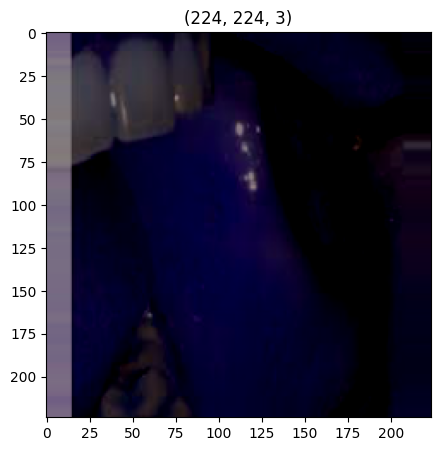

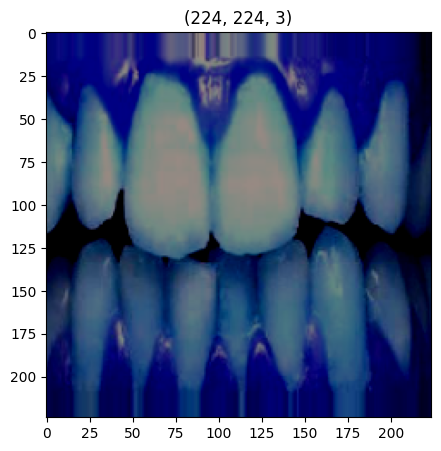

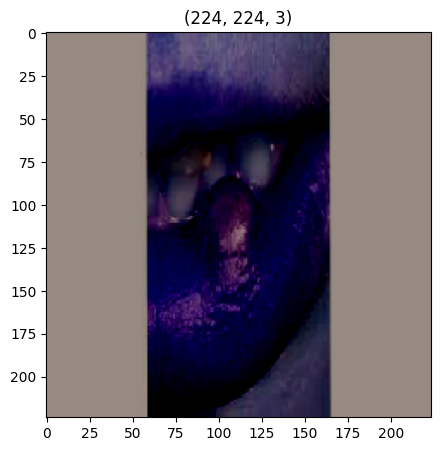

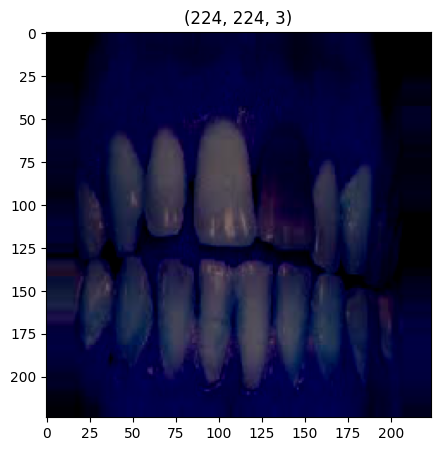

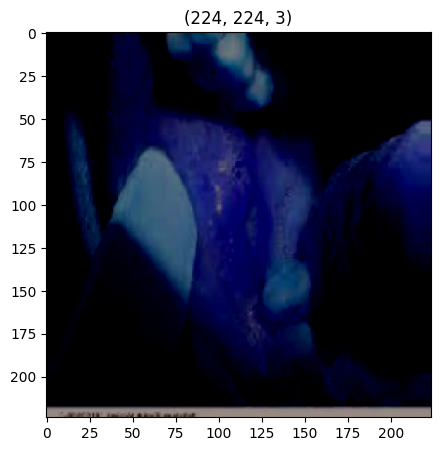

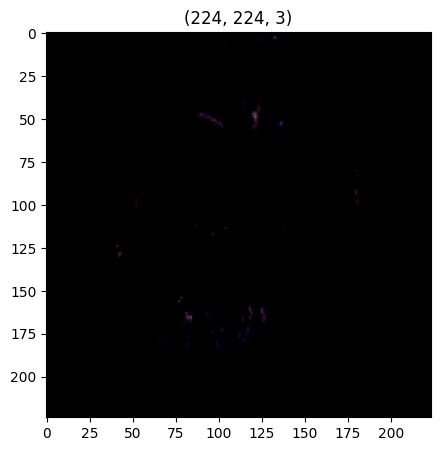

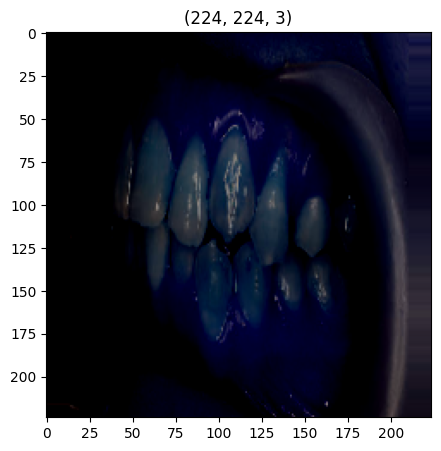

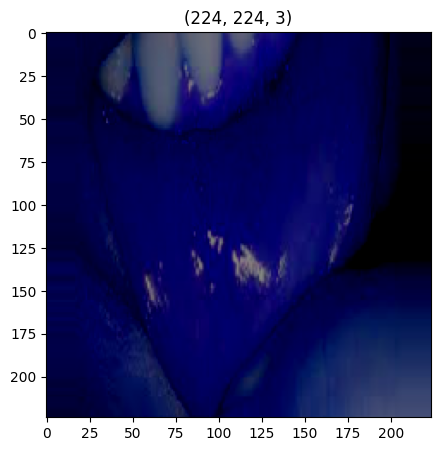

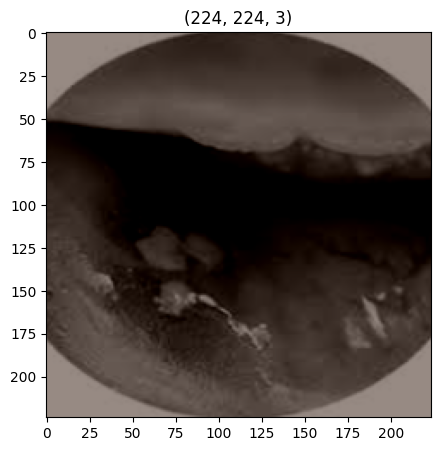

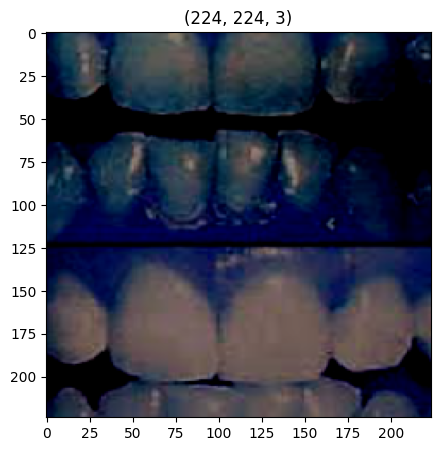

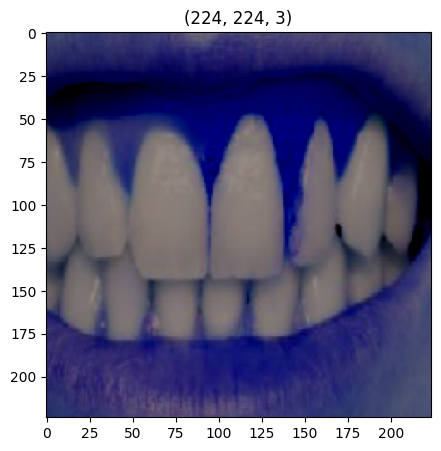

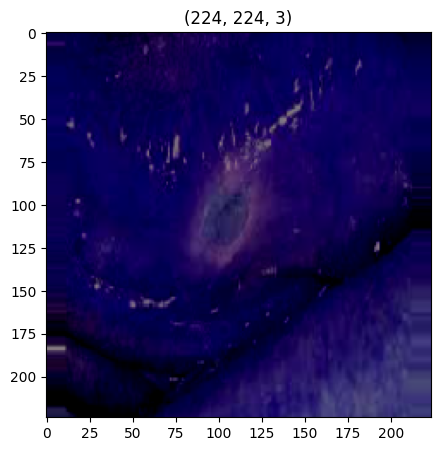

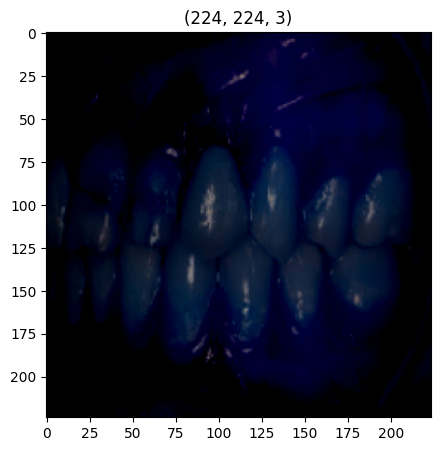

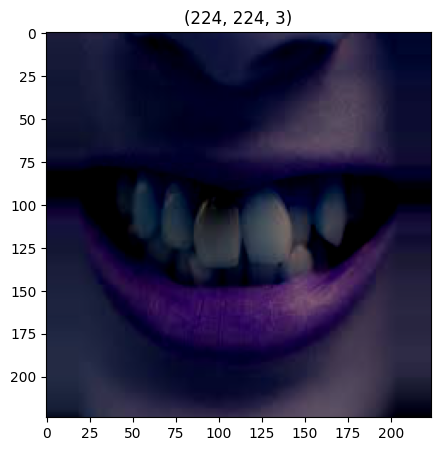

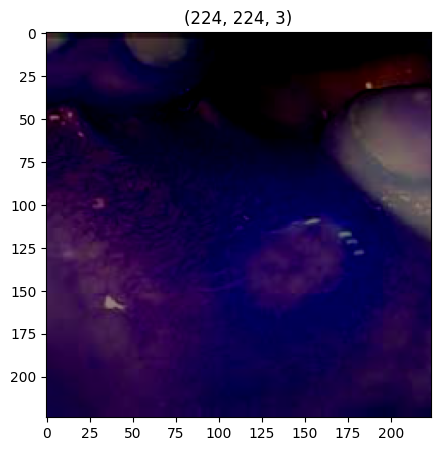

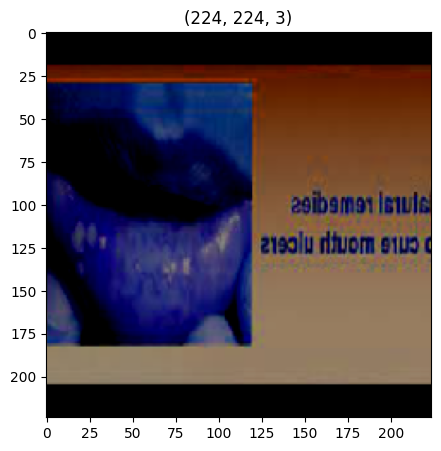

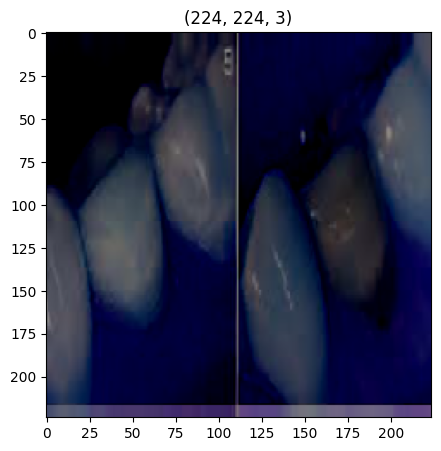

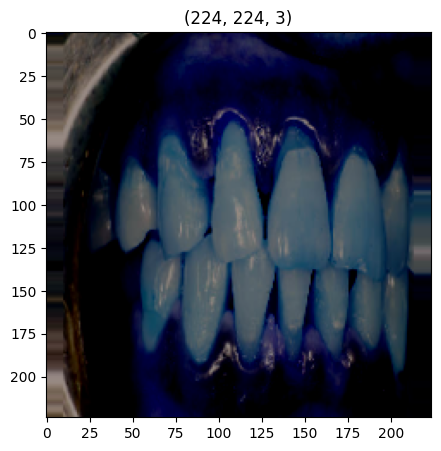

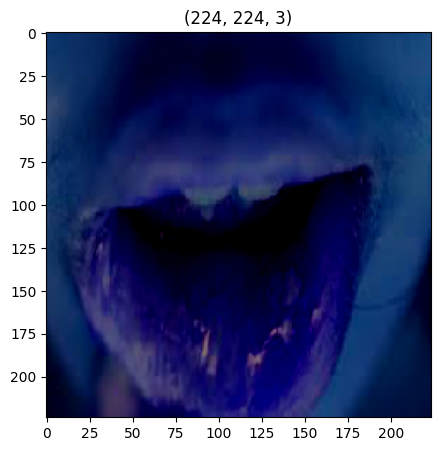

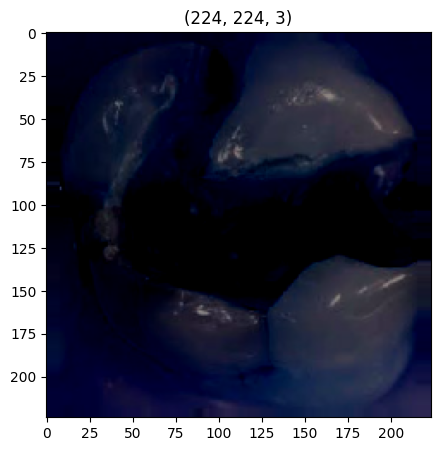

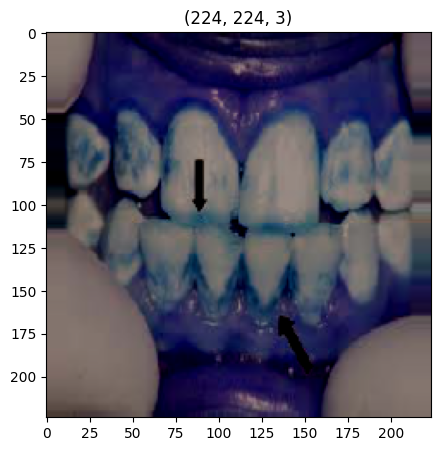

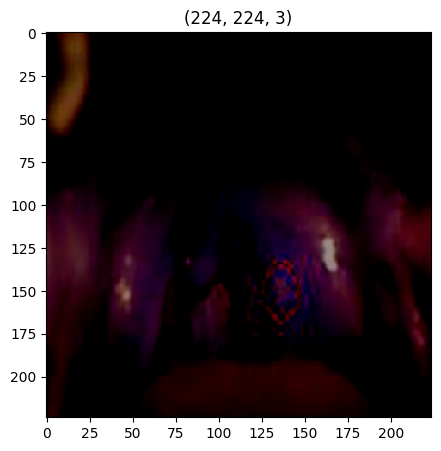

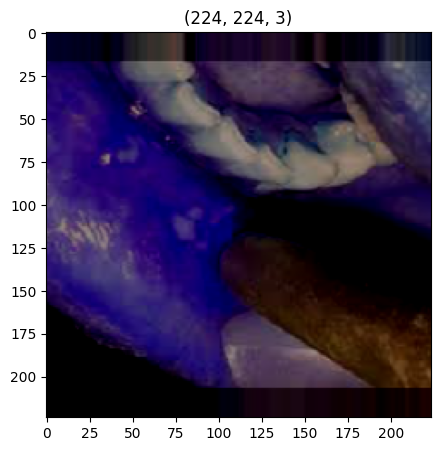

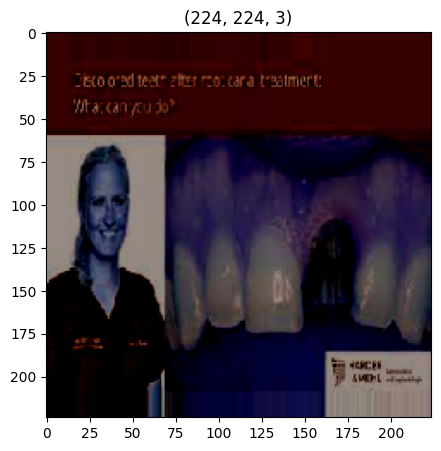

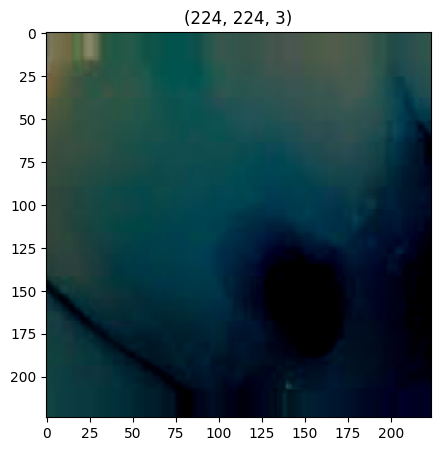

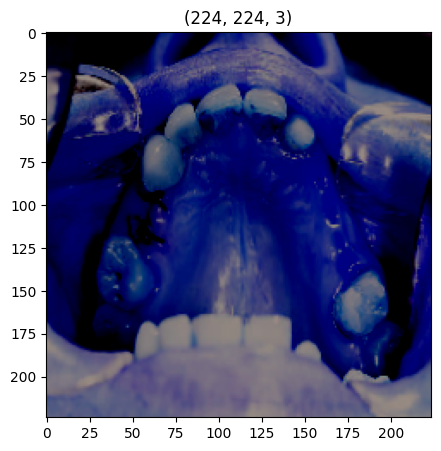

In [ ]:
plotImages(t_img, label)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(units=4, activation='softmax', name = 'predictions')(x)

model = Model(vgg.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= False)

In [ ]:
#hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 8, validation_data= valid , validation_steps= 32)
hist = model.fit_generator(train, steps_per_epoch= 10, epochs=30 , validation_data= valid , validation_steps= 32, callbacks=[mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.5037 - accuracy: 0.5406


Epoch 1: saving model to bestmodel.h5
10/10 [==============================] - 25s 1s/step - loss: 1.5037 - accuracy: 0.5406 - val_loss: 4.0893 - val_accuracy: 0.4945
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.7242 - accuracy: 0.8512
Epoch 2: saving model to bestmodel.h5
10/10 [==============================] - 5s 451ms/step - loss: 0.7242 - accuracy: 0.8512
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5065 - accuracy: 0.8201
Epoch 3: saving model to bestmodel.h5
10/10 [==============================] - 4s 397ms/step - loss: 0.5065 - accuracy: 0.8201
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.5465 - accuracy: 0.8304
Epoch 4: saving model to bestmodel.h5
10/10 [==============================] - 5s 542ms/step - loss: 0.5465 - accuracy: 0.8304
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.8270
Epoch 5: saving model to bestmodel.h5
10/10 [==============================

In [ ]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

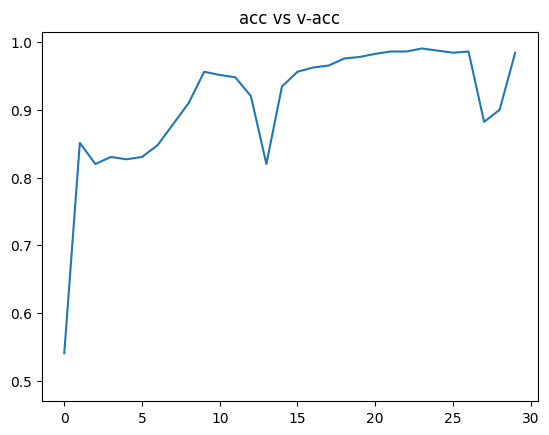

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

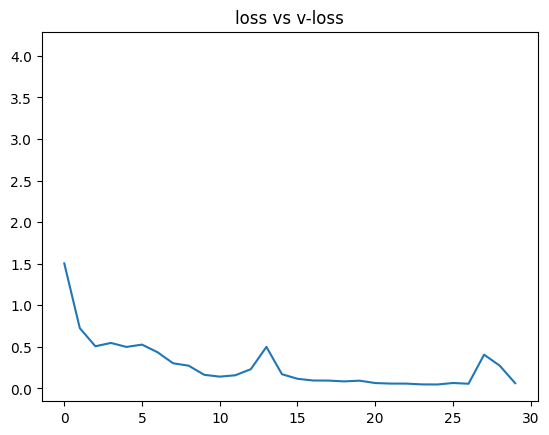

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.8846153616905212 %


In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path

  img = keras.utils.load_img(path, target_size=(224,224,3))

  img = keras.utils.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

1/1 [==============================] - 0s 19ms/step
The given  image is of type = tooth_discloration



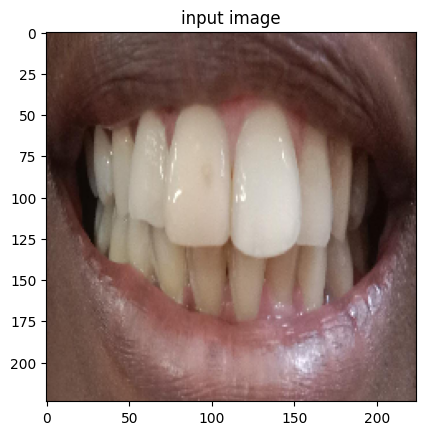

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)

path = "/content/sample7.jpg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
if res == 'uc':
  print(f"The given  image is of type = ulcer")
  print()
elif res == 'wc':
  print(f"The given  image is of type = with_carries")
  print()
elif res == 'gg':
  print(f"The given  image is of type = gingivitis")
  print()
elif res == 'dc':
  print(f"The given  image is of type = tooth_discloration")
  print()

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 83ms/step
The given  image is of type = tooth_discloration



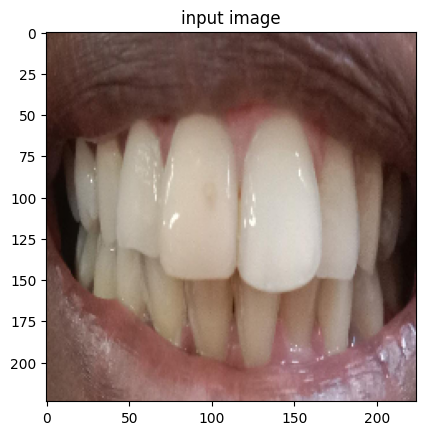

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)

path = "/content/sample.jpg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
if res == 'uc':
  print(f"The given  image is of type = ulcer")
  print()
elif res == 'wc':
  print(f"The given  image is of type = with_carries")
  print()
elif res == 'gg':
  print(f"The given  image is of type = gingivitis")
  print()
elif res == 'dc':
  print(f"The given  image is of type = tooth_discloration")
  print()

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 20ms/step
The given  image is of type = ulcer



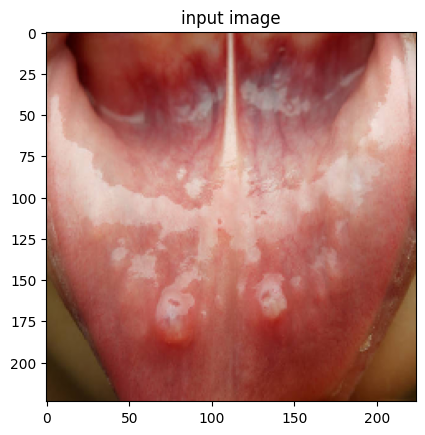

In [ ]:

path = "/content/Teeth_final/test/uc/uc (12).jpg"       # you can add any image path



#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
if res == 'uc':
  print(f"The given  image is of type = ulcer")
  print()
elif res == 'wc':
  print(f"The given  image is of type = with_carries")
  print()
elif res == 'gg':
  print(f"The given  image is of type = gingivitis")
  print()
elif res == 'dc':
  print(f"The given  image is of type = tooth_discloration")
  print()

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 28ms/step
The given  image is of type = with_carries



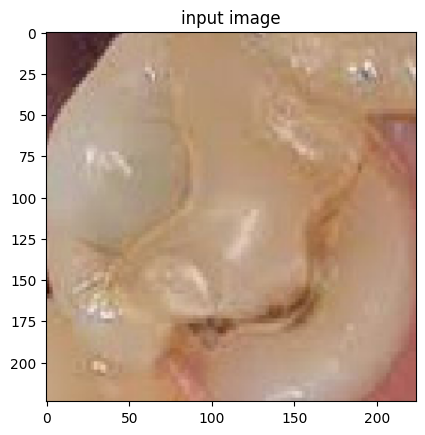

In [ ]:

path = "/content/Teeth_final/train/wc/wc (14).jpg"       # you can add any image path



#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
if res == 'uc':
  print(f"The given  image is of type = ulcer")
  print()
elif res == 'wc':
  print(f"The given  image is of type = with_carries")
  print()
elif res == 'gg':
  print(f"The given  image is of type = gingivitis")
  print()
elif res == 'dc':
  print(f"The given  image is of type = tooth_discloration")
  print()

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()